In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()


In [2]:
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

/var/folders/1n/6f1fz8zj2l12n8fdd74nq5780000gn/T/ipykernel_51340/1184982148.py:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


In [4]:
pd.set_option('display.max_columns',None) #Displaying all the columns of the dataset

In [5]:
df.head(20)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
5,32306554,12/31/2015 11:56:30 PM,01-01-16 1:50,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,21 STREET,5 AVENUE,6 AVENUE,N

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 55 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      300698 non-null  int64          
 1   Created Date                    300698 non-null  datetime64[ns] 
 2   Closed Date                     298534 non-null  datetime64[ns] 
 3   Agency                          300698 non-null  object         
 4   Agency Name                     300698 non-null  object         
 5   Complaint Type                  300698 non-null  object         
 6   Descriptor                      294784 non-null  object         
 7   Location Type                   300567 non-null  object         
 8   Incident Zip                    298083 non-null  float64        
 9   Incident Address                256288 non-null  object         
 10  Street Name                     256288 non-n

In [8]:
from datetime import date, time, datetime
df['Created Date'] = df['Created Date'].astype('datetime64[ns]')
df['Closed Date'] = df['Closed Date'].astype('datetime64[ns]')

In [9]:
df["time_difference"] = df['Closed Date'] - df['Created Date']
df["Request_Closing_Time"] = (df["time_difference"].astype('timedelta64[s]'))/(60*60)

In [10]:
df.head(15)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,time_difference,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,0.920833
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,1.437778
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31,4.858611
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14,7.753889
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02,3.450556
5,32306554,2015-12-31

<AxesSubplot:xlabel='Complaint Type'>

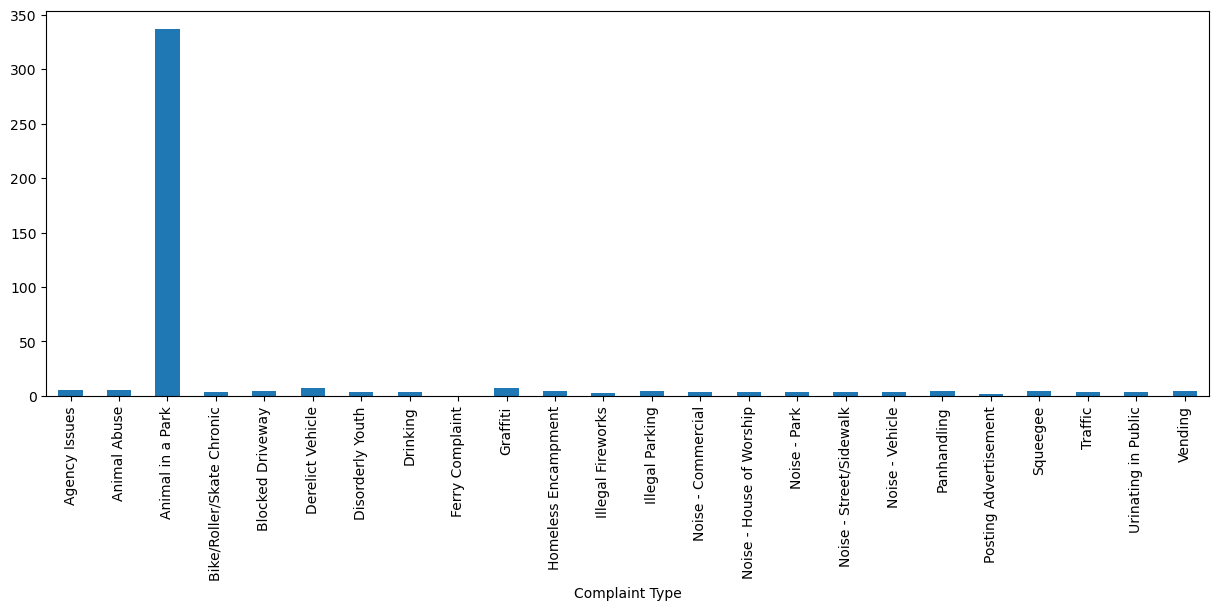

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15, 5)
df.groupby("Complaint Type")["Request_Closing_Time"].mean().plot.bar()
# "Animal in park" takes maximum average time close the tickets

<AxesSubplot:xlabel='Complaint Type'>

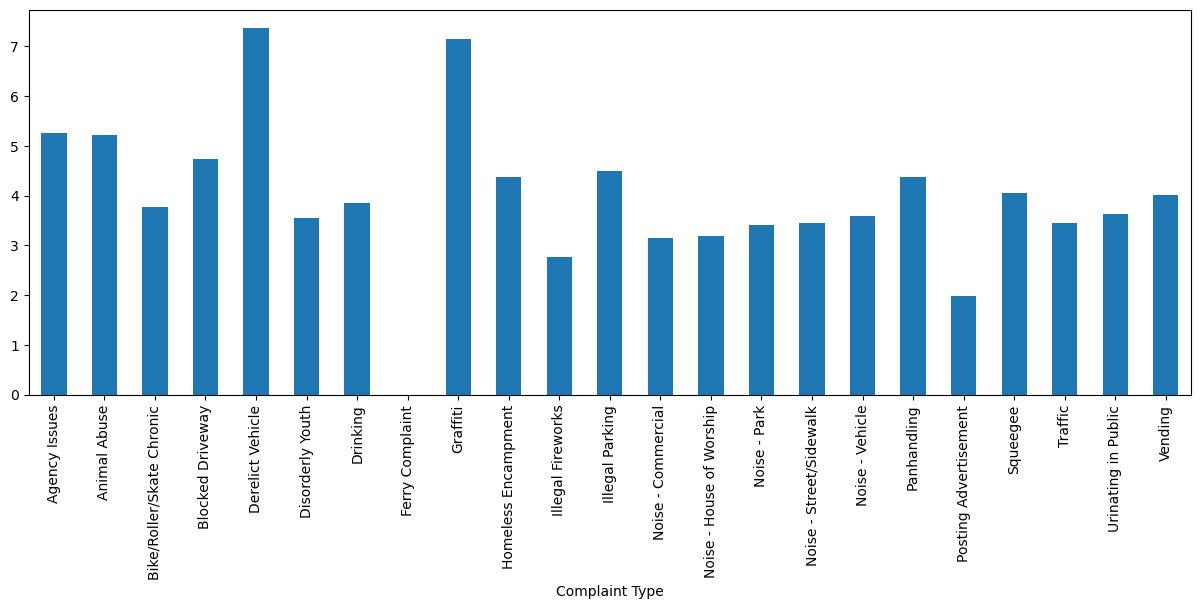

In [12]:
# Animal in a Park seems like an outlier. Hence if we remove it
df.loc[df["Complaint Type"] != "Animal in a Park",   ].groupby("Complaint Type")["Request_Closing_Time"].mean().plot.bar()

In [ ]:
#From the above figure we can see that 'Derelict Vehicle' and 'Graffiti' takes the maximum time to close the tickets.

<AxesSubplot:xlabel='Location Type'>

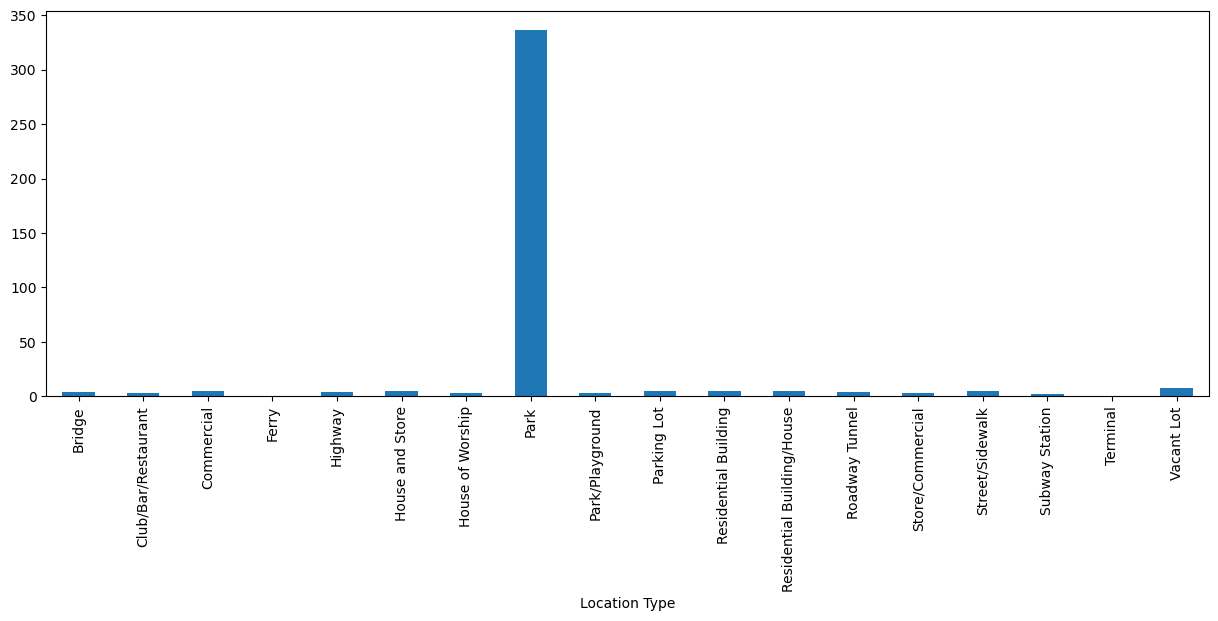

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15, 5)
df.groupby("Location Type")["Request_Closing_Time"].mean().plot.bar()
#"Park" takes maximum average time close the tickets

<AxesSubplot:xlabel='Location Type'>

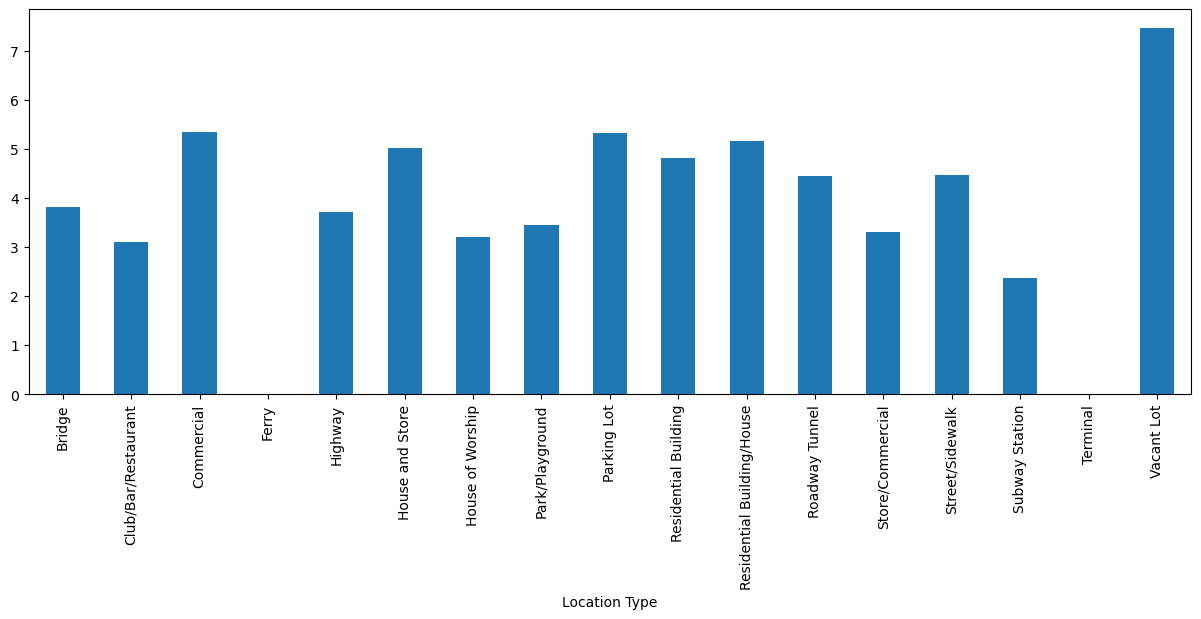

In [17]:
#Park seems like an outlier. Hence if we remove it
df.loc[df["Location Type"] != "Park",   ].groupby("Location Type")["Request_Closing_Time"].mean().plot.bar()
#we can observe that 'Vaccant Lot' takes the maximum time to close the tickets.

In [23]:
complaints_type_frequency = df.groupby('Complaint Type')['Unique Key'].count()
complaints_type_frequency = pd.DataFrame(complaints_type_frequency)
complaints_type_frequency = complaints_type_frequency.sort_values('Unique Key', ascending=0)
complaints_type_frequency
#From below table we can see that 'Blocked Driveway' complaint type were the most received complaint type.

,Unique Key
Complaint Type,
Blocked Driveway,77044
Illegal Parking,75361
Noise - Street/Sidewalk,48612
Noise - Commercial,35577
Derelict Vehicle,17718
Noise - Vehicle,17083
Animal Abuse,7778
Traffic,4498
Homeless Encampment,4416


In [26]:
complaints_status = df.groupby('Status')['Unique Key'].count()
complaints_status = pd.DataFrame(complaints_status)
complaints_status = complaints_status.sort_values('Unique Key', ascending=0)
complaints_status
#Below table shows that majority of the complaints received has been resolved and closed.

,Unique Key
Status,
Closed,298471
Open,1439
Assigned,786
Draft,2


In [19]:
# Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
a = pd.DataFrame(df.groupby(["Location","Complaint Type"])["Request_Closing_Time"].mean())
a.sort_values("Request_Closing_Time")

,,Request_Closing_Time
Location,Complaint Type,
"(40.678429539269835, -73.98361397723242)",Noise - Commercial,0.043611
"(40.76848580086362, -73.91235250532725)",Noise - Vehicle,0.045278
"(40.69371028050496, -73.95499211670034)",Illegal Parking,0.046389
"(40.71598512070559, -73.9509008064274)",Illegal Parking,0.047500
"(40.72895633655987, -74.00074325193769)",Noise - Commercial,0.050000
...,...,...
"(40.73681034405816, -73.93570112335456)",Illegal Parking,NaN
"(40.74285387870548, -73.97913408166315)",Blocked Driveway,NaN
"(40.749256156669986, -74.00919964319513)",Noise - Street/Sidewalk,NaN


In [20]:
#Checking whether the average response time across complaint types is similar or not (overall)
import statsmodels.formula.api as sm
mod = sm.ols(formula= """Request_Closing_Time ~ Q('Complaint Type') """,data=df).fit()
mod.summary()
#H0: there is no difference among the groups
#H1: at least one group is different than others
#We can see that the p vlaue is lower than the alpha, hence we reject the Null Hypothesis and conclude that
#at least 1 group is different.

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Request_Closing_Time   R-squared:                       0.037
Model:                              OLS   Adj. R-squared:                  0.036
Method:                   Least Squares   F-statistic:                     514.2
Date:                  Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                          15:36:06   Log-Likelihood:            -9.5737e+05
No. Observations:                298534   AIC:                         1.915e+06
Df Residuals:                    298511   BIC:                         1.915e+06
Df Model:                            22                                         
Covariance Type:              nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            5.2603      2.440      2.156      0.031       0.477      10.043
Q('Complaint Type')[T.Animal Abuse]                 -0.0471      2.441     -0.019      0.985      -4.832       4.738
Q('Complaint Type')[T.Animal in a Park]            331.5744      6.456     51.356      0.000     318.920     344.229
Q('Complaint Type')[T.Bike/Roller/Skate Chronic]    -1.4939      2.458     -0.608      0.543      -6.311       3.323
Q('Complaint Type')[T.Blocked Driveway]             -0.5194      2.440     -0.213      0.831      -5.303       4.264
Q('Complaint Type')[T.Derelict Vehicle]              2.1038      2.441      0.862      0.389      -2.680       6.888
Q('Complaint Type')[T.Disorderly Youth]             -1.7017      2.466     -0.690      0.490      -6.535       3.131
Q('Complaint Type')[T.Drinking]                     -1.3985      2.446     -0.572      0.568      -6.193       3.396
Q('Complaint Type')[T.Ferry Complaint]            4.842e-13   1.07e-14     45.442      0.000    4.63e-13    5.05e-13
Q('Complaint Type')[T.Graffiti]                      1.8909      2.504      0.755      0.450      -3.017       6.799
Q('Complaint Type')[T.Homeless Encampment]          -0.8948      2.442     -0.366      0.714      -5.681       3.891
Q('Complaint Type')[T.Illegal Fireworks]            -2.4992      2.484     -1.006      0.314      -7.367       2.368
Q('Complaint Type')[T.Illegal Parking]              -0.7592      2.440     -0.311      0.756      -5.542       4.024
Q('Complaint Type')[T.Noise - Commercial]           -2.1132      2.441     -0.866      0.387      -6.897       2.670
Q('Complaint Type')[T.Noise - House of Worship]     -2.0670      2.448     -0.844      0.398      -6.865       2.731
Q('Complaint Type')[T.Noise - Park]                 -1.8496      2.442     -0.757      0.449      -6.636       2.937
Q('Complaint Type')[T.Noise - Street/Sidewalk]      -1.8151      2.440     -0.744      0.457      -6.598       2.968
Q('Complaint Type')[T.Noise - Vehicle]              -1.6713      2.441     -0.685      0.493      -6.455       3.112
Q('Complaint Type')[T.Panhandling]                  -0.8876      2.464     -0.360      0.719      -5.717       3.942
Q('Complaint Type')[T.Posting Advertisement]        -3.2845      2.452     -1.340      0.180      -8.090       1.521
Q('Complaint Type')[T.Squeegee]                     -1.2147      3.858     -0.315      0.753      -8.777       6.348
Q('Complaint Type')[T.Traffic]                      -1.8116      2.442     -0.742      0.458      -6.598       2.974
Q('Complaint Type')[T.Urinating in Public]          -1.6337      2.453     -0.666      0.505      -6.441       3.173
Q('Complaint Type')

In [22]:
#Are the type of complaint or service requested and location related?
CrosstabResult=pd.crosstab(index=df['Complaint Type'],columns=df['Location'])
from scipy.stats import chi2_contingency
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

#H0: there is no relation
#H1: there is a relation

# The p vlaue is less than 0.05, hence we reject the Null hypothesis and conclude that there is a relation between 
# Complaint and Location

The P-Value of the ChiSq Test is: 0.0
